In [7]:
import requests
import urllib3
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import os
os.environ["PROJ_LIB"] = "/opt/conda/share/proj"
from mpl_toolkits.basemap import Basemap


In [2]:
  
    """
    Open a remote connection to a NetCDF4 Dataset at `url`.
    Show information about variable `var_id`.
    Print metadata / data in the file and return the Dataset object.
    :param url: URL to a NetCDF OpenDAP end-point.
    :param var_id: Variable ID in NetCDF file [string]
    :return: netCDF4 Dataset object
    """
    url = ('https://aws.wfas.net/geoserver/hrrr/wcs?service=WCS&version=2.0.1&request=GetCoverage&coverageId=Temperature&&subset=time(\"2020-12-15T00:00:00Z\",\"2020-12-15T00:00:00Z\")&format=application/x-netcdf4')
    
    #Suppress Python ssl warnings:
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

    #Make the request for the data with SSL verification disabled:
    data = requests.get(url,verify=False).content
    
    var_id = "Temperature"
    dataset = Dataset(var_id, memory=data)
    lons = np.array(dataset.variables['x'][:])
    lats = np.array(dataset.variables['y'][:])
    tempK = dataset.variables['Temperature'][0,:,:]

    print('\n[INFO] Global attributes:')
    for attr in dataset.ncattrs():
        print('\t{}: {}'.format(attr, dataset.getncattr(attr)))

    print('\n[INFO] Variables:\n{}'.format(dataset.variables))
    print('\n[INFO] Dimensions:\n{}'.format(dataset.dimensions))

    print('\n[INFO] Max and min variable: {}'.format(var_id))
    variable = dataset.variables[var_id][:]
    units = dataset.variables[var_id].units
    print('\tMin: {:.6f} {}; Max: {:.6f} {}'.format(variable.min(), units, variable.max(), units))


[INFO] Global attributes:

[INFO] Variables:
{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time
    description: time
    units: seconds since 1970-01-01 00:00:00 UTC
unlimited dimensions: 
current shape = (1,)
filling off, 'y': <class 'netCDF4._netCDF4.Variable'>
float32 y(y)
    long_name: y coordinate of projection
    units: m
    standard_name: projection_y_coordinate
unlimited dimensions: 
current shape = (1059,)
filling off, 'x': <class 'netCDF4._netCDF4.Variable'>
float32 x(x)
    long_name: x coordinate of projection
    units: m
    standard_name: projection_x_coordinate
unlimited dimensions: 
current shape = (1799,)
filling off, 'Temperature': <class 'netCDF4._netCDF4.Variable'>
float64 Temperature(time, y, x)
    long_name: Temperature
    units: deg[K]
    grid_mapping: lambert_conformal_conic
unlimited dimensions: 
current shape = (1, 1059, 1799)
filling off, 'lambert_conformal_conic': <class 'netCDF4._netCDF4.Variable'>
|S1 lambert_confo

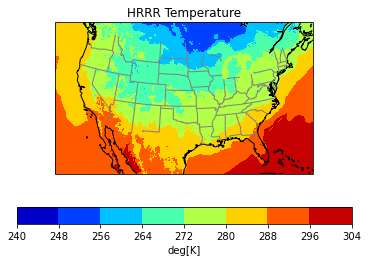

In [19]:
# Plot Data
tempK_prj = ccrs.LambertConformal(central_longitude=-97.5,\
                                               central_latitude=38.5,\
                                               false_easting=0.0,\
                                               false_northing=0.0
                                              )
ax = plt.axes(projection=tempK_prj)

plt.contourf(lons, lats, tempK, cmap='jet')

# Add Coastlines, and States Boundaries
ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', '110m',
    edgecolor='gray', facecolor='none'))
# Add Title
plt.title('HRRR Temperature')
# Add Colorbar
cbar = plt.colorbar(ax=ax, orientation='horizontal')
cbar.set_label(dataset.variables['Temperature'].units)
plt.show()
